In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
sns.set_style("whitegrid")

In [2]:
def make3(init):
    return [init + 3*i for i in range(10)]

In [3]:
def il(str):
    res = []
    for ele in str.split('/'):
        res.append([float(e) for e in ele.split('+')])
    if len(res) == 1:
        return res[0]
    else:
        return res

# 使用惠斯通电桥测量铜电阻

In [12]:
def b_bridge(Us, R1, R2, _R3_l, _t_l):
    alpha_0 = 0.00428
    K = R1 / R2
    R3_l = np.array(_R3_l)
    Rx_l = R3_l * K
    t_l = np.array(_t_l)
    item_list = [t_l, R3_l, Rx_l]
    item_name = ['温度', 'R_3测量值', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`b_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `_R3_l` : R3测量值数列
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`


数据	温度	    R_3测量值	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	28.20	    562.34	    56.23	    
#1	31.20	    568.42	    56.84	    
#2	34.20	    574.69	    57.47	    
#3	37.20	    581.00	    58.10	    
#4	40.20	    587.38	    58.74	    
#5	43.20	    593.79	    59.38	    
#6	46.20	    599.85	    59.99	    
#7	49.20	    606.17	    60.62	    
#8	52.20	    612.59	    61.26	    
#9	55.20	    619.01	    61.90	    
---------------------------------------------------------------------------------------------------------------
R = 0.2100t + 50.295
R = 50.295 * (1 + 0.004176t)
不确定度 U_alpha = 2.4%


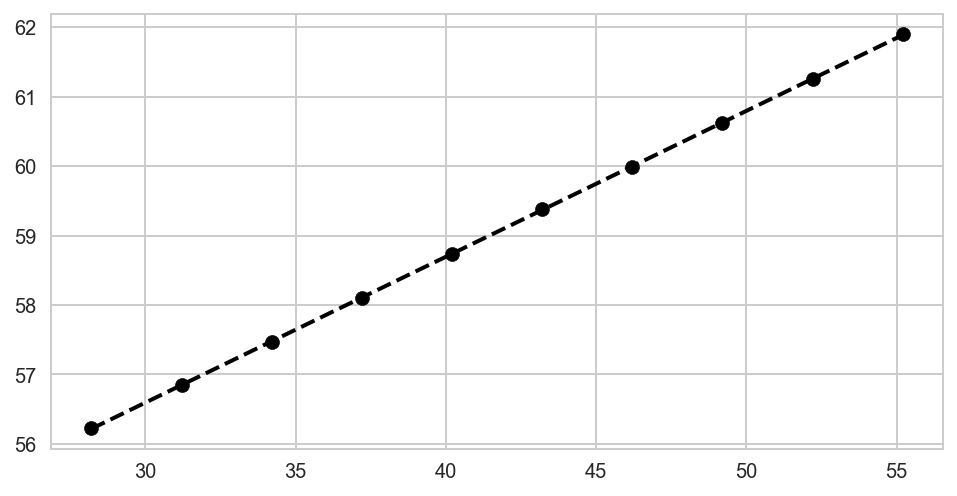

In [13]:
b_data = {
    'Us'    : 5, 
    'R1'    : 100,
    'R2'    : 1000,
    '_R3_l' : il("562.34+568.42+574.69+581.00+587.38+593.79+599.85+606.17+612.59+619.01"), 
    '_t_l'  : make3(28.2)
}
b_bridge(**b_data)

# 使用卧式电桥测量铜电阻

In [6]:
def l_bridge(Us, R2, R3, R1_0, _t_l, _U_l):
    alpha_0 = 0.00428
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    d_Rx = 4 * R1_0 * U_l * 10**-3 / Us
    Rx_l = np.round(R1_0 + d_Rx, 2)
    item_list = [t_l, U_l, d_Rx, Rx_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list:
            print("%.2f" % ll[i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 4]
    plt.rcParams['figure.dpi'] = 144
    plt.scatter(t_l, Rx_l, color='black')
    A = np.vstack([t_l, np.ones(len(t_l))]).T
    m, c = np.linalg.lstsq(A, np.array(Rx_l), rcond=1)[0]
    alpha = m / c
    print("R = %.4ft + %.3f" % (m, c))
    print("R = %.3f * (1 + %ft)" % (c, alpha))
    print("R_0 = %.3f, alpha = %f" % (c, alpha))
    print("不确定度 U_alpha = %.1f%%" % ((np.abs(alpha - alpha_0) * 100 / alpha_0)))
    plt.plot(t_l, m * t_l + c, linewidth=2, color='black', linestyle='--')

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R2` : R2阻值
3. `R3` : R3阻值
4. `R1_0` : R1初始测量值
5. `_t_l` : 温度T测量值数列,温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    
---------------------------------------------------------------------------------------------------------------
#0	31.20	    0.00	    0.00	    56.83	    
#1	34.20	    3.50	    0.61	    57.44	    
#2	37.20	    6.60	    1.15	    57.98	    
#3	40.20	    10.10	    1.77	    58.60	    
#4	43.20	    13.50	    2.36	    59.19	    
#5	46.20	    16.80	    2.94	    59.77	    
#6	49.20	    20.20	    3.53	    60.36	    
#7	52.20	    23.60	    4.13	    60.96	    
#8	55.20	    26.90	    4.70	    61.53	    
#9	58.20	    30.10	    5.26	    62.09	    
---------------------------------------------------------------------------------------------------------------
R = 0.1954t + 50.740
R = 50.740 * (1 + 0.003851t)
R_0 = 50.740, alpha = 0.003851
不确定度 U_alpha = 10.0%


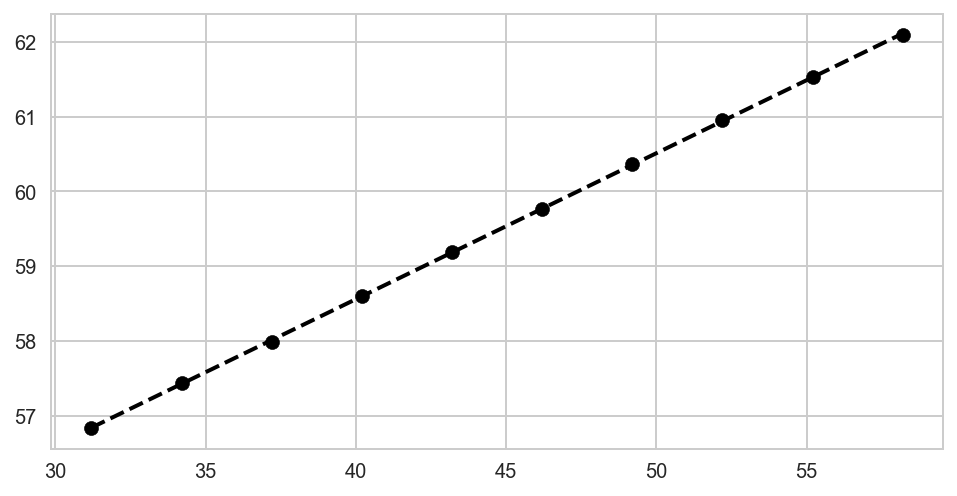

In [14]:
l_data = {
    'Us'   : 1.3,
    'R2'   : 50,
    'R3'   : 50,
    'R1_0' : 56.83,
    '_t_l' : make3(31.2),
    '_U_l' : il("0+3.5+6.6+10.1+13.5+16.8+20.2+23.6+26.9+30.1")
}
l_bridge(**l_data)

# 使用立式电桥测量热敏电阻

In [8]:
def s_bridge(Us, R1, R2, R3_0, _t_l, _U_l):
    t_l = np.array(_t_l)
    U_l = np.array(_U_l)
    R_ = R1
    R = R3_0
    d_Rx = ((R+R_)**2 * U_l * 10**-3) / (R_*Us - (R+R_)*U_l*10**-3)
    Rx_l = np.round(R3_0 + d_Rx, 2)
    tr_Rx_l = np.log(Rx_l)
    T_l = t_l + 273
    tr_T_l = 1 / T_l
    item_list = [t_l, U_l, d_Rx, Rx_l, T_l, tr_Rx_l, tr_T_l]
    item_name = ['温度', '电压测量值', 'delta_R_x', 'R_x计算值','T(=t+273)', 'ln(R_x)', '1/T']
    print("数据", end='\t')
    for e in item_name:
        print(e, end='\t    ')
    print('', end='\n')
    
    print('---------------------------------------------------------------------------------------------------------------')
    for i in range(t_l.shape[0]):
        print("#%d" % i, end='\t')
        for ll in item_list[:-2]:
            print("%.2f" % ll[i], end='\t    ')
        print("%.4f" % item_list[-2][i], end='\t    ')
        print("%.6f" % item_list[-1][i], end='\t    ')
        print('\n', end='')
    print('---------------------------------------------------------------------------------------------------------------')
    plt.rcParams['figure.figsize'] = [8, 8]
    plt.rcParams['figure.dpi'] = 144
    plt.subplot(211)
    plt.scatter(T_l, Rx_l, color='black')
    plt.plot(T_l, Rx_l, color='black', linestyle='-')
    plt.subplot(212)
    L = tr_T_l.min()
    H = tr_T_l.max()
    d = (H - L) / 10
    plt.xlim(L - d, H + d)
    plt.scatter(tr_T_l, tr_Rx_l, color='black')
    A = np.vstack([tr_T_l, np.ones(len(tr_T_l))]).T
    m, c = np.linalg.lstsq(A, np.array(tr_Rx_l), rcond=1)[0]
    plt.plot(tr_T_l, m * tr_T_l + c, linewidth=2, color='black', linestyle='--')
    print("ln(R_x) = %.1f * (1/T) + (%.4f)" % (m, c))
    R_0 = np.exp(c)
    B_n = m
    print("R_x = R_0 * e^(B_n/T) = %.3f * e^(%.1f/T)" % (R_0, B_n))
    print("R_0 = %.3f, B_n = %.1f" % (R_0, B_n))

**请将数据放入字典对象`l_data`中**

参数解释:
1. `Us` :平衡电压
2. `R1` : R1阻值
3. `R2` : R2阻值
4. `R3_0` : R3初始测量值
5. `_t_l` : 温度T测量值数列,若时间差恒为3,可使用`make3(你的初始时间)`,例如`make3(34.0)`
6. `_U_l` : 电压测量值数列


数据	温度	    电压测量值	    delta_R_x	    R_x计算值	    T(=t+273)	    ln(R_x)	    1/T	    
---------------------------------------------------------------------------------------------------------------
#0	31.40	    0.00	    0.00	    2296.74	    304.40	    7.7392	    0.003285	    
#1	34.40	    -5.00	    -202.29	    2094.45	    307.40	    7.6470	    0.003253	    
#2	37.40	    -11.00	    -404.11	    1892.63	    310.40	    7.5457	    0.003222	    
#3	40.40	    -17.60	    -587.17	    1709.57	    313.40	    7.4440	    0.003191	    
#4	43.40	    -24.90	    -754.09	    1542.65	    316.40	    7.3413	    0.003161	    
#5	46.40	    -32.70	    -901.46	    1395.28	    319.40	    7.2409	    0.003131	    
#6	49.40	    -41.00	    -1031.77	    1264.97	    322.40	    7.1428	    0.003102	    
#7	52.40	    -50.10	    -1150.82	    1145.92	    325.40	    7.0440	    0.003073	    
#8	55.40	    -59.80	    -1256.79	    1039.95	    328.40	    6.9469	    0.003045	    
#9	58.40	    -70.20	    -1352.06	    944.68	    331.40	

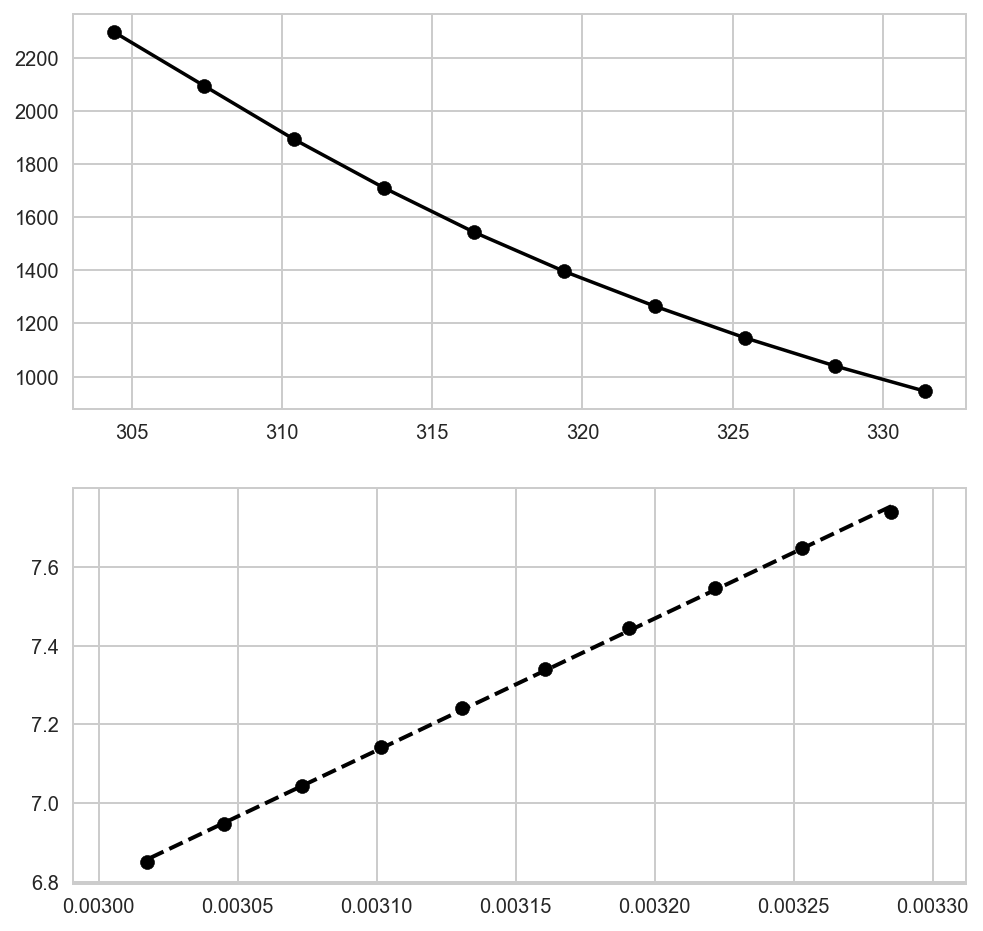

In [15]:
s_data = {
    'Us'   : 1.3, 
    'R1'   : 100, 
    'R2'   : 100, 
    'R3_0' : 2296.74, 
    '_t_l' : make3(31.4), 
    '_U_l' : il("0+-5.0+-11.0+-17.6+-24.9+-32.7+-41.0+-50.1+-59.8+-70.2")
}
s_bridge(**s_data)